In [621]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, lars_path
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import seaborn as sns

In [622]:
df = pd.read_csv('data/workable_df.csv')
df.describe()

,Unnamed: 0,Total Cases,Total Cases per 100k,Total Deaths,Total Deaths per 100k,Fully Vaccinated,Daily Case Avg,Daily Case 14-Day change %,Hosp. Daily per 100k,Hosp. Daily change %,Deaths Daily Avg.,Deaths Daily per 100k
count,3215.000000,3.215000e+03,3215.000000,3215.000000,3215.000000,3215.000000,3215.000000,3007.000000,3215.000000,3215.000000,1153.000000,3215.000000
mean,1607.000000,1.018039e+04,9918.477760,184.760281,201.966667,25.674961,11.296734,11.417359,-19.407465,0.194432,0.544501,29.201669
std,928.234884,3.919525e+04,3072.901355,865.703826,110.040287,12.736809,36.733864,9.824055,63.987233,0.888653,0.761756,7.662983
min,0.000000,1.000000e+00,423.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.020000,1.000000
25%,803.500000,1.050000e+03,8167.500000,20.000000,125.000000,21.000000,1.000000,6.000000,-46.000000,0.000000,0.170000,25.000000
50%,1607.000000,2.514000e+03,9968.000000,51.000000,191.000000,27.000000,2.000000,9.000000,-16.000000,0.000000,0.330000,27.000000
75%,2410.500000,6.413000e+03,11656.000000,126.000000,256.000000,34.000000,8.000000,14.000000,0.000000,0.100000,0.610000,34.000000
max,3214.000000,1.237120e+06,37095.000000,32966.000000,866.000000,65.000000,862.000000,122.000000,847.000000,29.400000,12.700000,65.000000


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3215 entries, 0 to 3214
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3215 non-null   int64  
 1   County                      3215 non-null   object 
 2   Total Cases                 3215 non-null   float64
 3   Total Cases per 100k        3215 non-null   float64
 4   Total Deaths                3215 non-null   float64
 5   Total Deaths per 100k       3215 non-null   float64
 6   Fully Vaccinated            3215 non-null   float64
 7   Daily Case Avg              3215 non-null   float64
 8   Daily Case 14-Day change %  3007 non-null   float64
 9   Hospitalized Daily Avg      2353 non-null   object 
 10  Hosp. Daily per 100k        3215 non-null   float64
 11  Hosp. Daily change %        3215 non-null   float64
 12  Deaths Daily Avg.           1153 non-null   float64
 13  Deaths Daily per 100k       3215 

In [624]:
(df['Deaths Daily Avg.'].sample(n=1,random_state=np.random.randint(1,100,1)).values)[0]

0.18

In [625]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Hospitalized Daily Avg'],axis=1)
df = shuffle(df)
df = df.dropna()
#df = df.loc[df['Hosp. Daily per 100k']!=-100]
#df = df.loc[df['Hosp. Daily per 100k']>-1]
df = df.loc[df['Daily Case Avg']<200]

In [626]:
X = df.drop(['Daily Case Avg'], axis=1)
y = df['Daily Case Avg']
#df['Deaths Daily Avg.'].sample(n=1, random_state=0)
#X = X.drop(columns=X.columns[5:8])

count    1125.000000
mean       20.588444
std        29.794319
min         1.000000
25%         3.000000
50%         8.000000
75%        24.000000
max       198.000000
Name: Daily Case Avg, dtype: float64

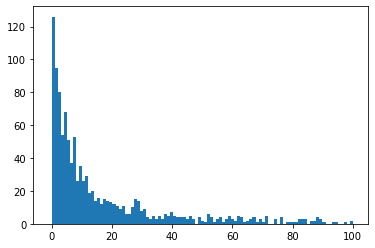

In [627]:
plt.hist(y, range=(-1, 100), bins=100)
y.describe()

In [628]:
X = X.dropna()
y = y.dropna()
COUNTY_NAMES = X['County']
X = X.drop('County',axis=1)
X, test_X, y, test_y = train_test_split(X, y, test_size = .2)
df.corr()

,Total Cases,Total Cases per 100k,Total Deaths,Total Deaths per 100k,Fully Vaccinated,Daily Case Avg,Daily Case 14-Day change %,Hosp. Daily per 100k,Hosp. Daily change %,Deaths Daily Avg.,Deaths Daily per 100k
Total Cases,1.000000,0.015440,0.946104,-0.010853,0.133474,0.072396,0.000893,-0.021119,0.053398,-0.068035,0.090939
Total Cases per 100k,0.015440,1.000000,0.013649,0.486578,-0.027558,0.020886,0.409740,0.061407,-0.032255,0.041421,-0.167399
Total Deaths,0.946104,0.013649,1.000000,0.049391,0.117345,0.055285,0.009812,-0.017992,0.040002,-0.055657,0.075550
Total Deaths per 100k,-0.010853,0.486578,0.049391,1.000000,-0.105386,-0.027669,0.097588,0.076103,-0.026527,0.014938,-0.156506
Fully Vaccinated,0.133474,-0.027558,0.117345,-0.105386,1.000000,0.123311,0.063832,-0.078131,0.087504,-0.061331,0.407581
Daily Case Avg,0.072396,0.020886,0.055285,-0.027669,0.123311,1.000000,0.141421,-0.029022,0.574141,-0.252102,0.299626
Daily Case 14-Day change %,0.000893,0.409740,0.009812,0.097588,0.063832,0.141421,1.000000,0.011407,0.010339,0.193625,0.007818
Hosp. Daily per 100k,-0.021119,0.061407,-0.017992,0.076103,-0.078131,-0.029022,0.011407,1.000000,-0.034801,0.028636,-0.062681
Hosp. Daily change %,0.053398,-0.032255,0.040002,-0.026527,0.087504,0.574141,0.010339,-0.034801,1.000000,-0.011348,0.203908
Deaths Daily Avg.,-0.068035,0.041421,-0.055657,0.014938,-0.061331,-0.252102,0.193625,0.028636,-0.011348,1.000000,-0.160717


In [629]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

Text(0.5, 0, 'Predicted Case Change')

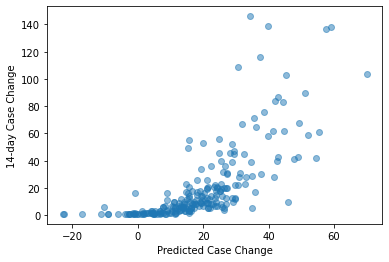

In [630]:
predictions = lr.predict(test_X)
plt.scatter(predictions, test_y, alpha=.5)
plt.ylabel('14-day Case Change')
plt.xlabel('Predicted Case Change')

In [631]:
lr.score(X, y)

0.4352638356534907

In [632]:
lr.score(test_X, test_y)

0.47728447232567894

In [633]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Daily Case Avg   R-squared (uncentered):                   0.612
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              140.3
Date:                Fri, 14 May 2021   Prob (F-statistic):                   3.08e-175
Time:                        02:41:53   Log-Likelihood:                         -4092.3
No. Observations:                 900   AIC:                                      8205.
Df Residuals:                     890   BIC:                                      8253.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Total Cases                 5.374e-05   3.99e-05      1.347      0.178   -2.45e-05       0.000
Total Cases per 100k          -0.0005      0.000     -1.595      0.111      -0.001       0.000
Total Deaths                  -0.0019      0.002     -1.134      0.257      -0.005       0.001
Total Deaths per 100k          0.0051      0.009      0.591      0.555      -0.012       0.022
Fully Vaccinated              -0.0795      0.065     -1.215      0.225      -0.208       0.049
Daily Case 14-Day change %     0.7396      0.104      7.141      0.000       0.536       0.943
Hosp. Daily per 100k           0.0032      0.016      0.200      0.842      -0.029       0.035
Hosp. Daily change %          19.5203      0.951     20.524      0.000      17.654      21.387
Deaths Daily Avg.            -11.0440      1.083    -10.194      0.000     -13.170      -8.918
Deaths Daily per 100k          0.4788      0.083      5.749      0.000       0.315       0.642
==============================================================================
Omnibus:                      371.575   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27019.963
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                      29.770   Cond. No.                     9.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

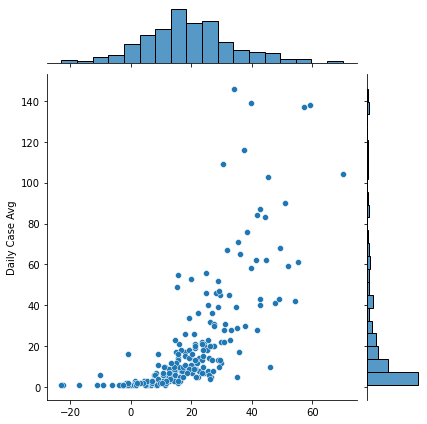

In [634]:
sns.jointplot(y=test_y, x=predictions)

In [635]:
X, test_X, y, test_y = train_test_split(X, y, test_size = .2)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = .2)

In [636]:
scaler = StandardScaler()

train_Xscaled = scaler.fit_transform(train_X.values)
val_Xscaled = scaler.fit_transform(val_X.values)
test_Xscaled = scaler.fit_transform(test_X.values)

In [637]:
ridge = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2)

train_Xpoly = poly.fit_transform(train_X.values)
val_Xpoly = poly.fit_transform(val_X.values)
test_Xpoly = poly.fit_transform(test_X.values)

In [638]:
lr = LinearRegression()
lr_poly = LinearRegression()

lr.fit(train_X, train_y)
ridge.fit(train_Xscaled, train_y)
lr_poly.fit(train_Xpoly, train_y)

LinearRegression()

In [639]:
print(f'Lin. Reg: {lr.score(val_X, val_y):.3f}')
print(f'Ridge: {ridge.score(val_Xscaled, val_y):.3f}')
print(f'Poly: {lr_poly.score(val_Xpoly, val_y):.3f}')

Lin. Reg: 0.483
Ridge: 0.678
Poly: -4.058


In [640]:
predictions = lr.predict(X)
X['County'] = COUNTY_NAMES

<ipython-input-640-5674c2dfb7df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['County'] = COUNTY_NAMES


In [641]:
X['Predicted Values'] = predictions

<ipython-input-641-a0d9223ce2c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Predicted Values'] = predictions


In [642]:
R = X[['County','Predicted Values']]

In [643]:
X[['County','Predicted Values']].describe()

,Predicted Values
count,720.000000
mean,21.041359
std,19.437018
min,-50.075760
25%,11.164961
50%,19.406248
75%,29.136115
max,267.732795
